<a href="https://colab.research.google.com/github/hsinlun99/HPIT-group-project-colab/blob/main/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Initialization


## Everytime you open the colab file, you need to run all the cells of this section first!


In [1]:
import gspread
print(gspread.__version__)

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

6.0.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import fill

workbook = gc.open_by_key('1aeHyYsF65RE08W-M46mZz1CdUxEIxR4J9imKsWeDBew')

sheet_a = workbook.worksheet('Group A(Real)')
sheet_b = workbook.worksheet('Group B(AI)')

values = sheet_a.get_all_values()
df_a = pd.DataFrame(values[1:], columns=values[0])

values = sheet_b.get_all_values()
df_b = pd.DataFrame(values[1:], columns=values[0])

In [3]:
# Function for question pairs
def generate_boxplot(df_a, df_b, column_name, title, max_width=50):
    # Extract and rename columns
    q_a = pd.Series(df_a[column_name], name="A (Real faces)")
    q_b = pd.Series(df_b[column_name], name="B (AIG faces)")

    # Concatenate and convert to float
    df_q = pd.concat([q_a, q_b], axis=1).astype(float)

    #5B93C4 original
    #99BBFF
    box_blue = "#99BBFF"

    # Create boxplot
    ax = df_q.boxplot(
        medianprops=dict(color="red", linewidth=2),
        patch_artist=True,
        boxprops=dict(facecolor=box_blue, color=box_blue),
        whiskerprops=dict(color=box_blue, linewidth=2)
    )

    wrapped_title = fill(title+': '+column_name, width=max_width)
    ax.set_title(wrapped_title, fontsize=14) # pad=5 for question 7: Based on...
    ax.set_yticks([i * 0.5 for i in range(2, 11)])
    plt.show()


In [7]:
def generate_all_boxplot(df_a, df_b, column_names, max_width=50):
    # Validate input
    if not isinstance(column_names, list):
        raise ValueError("column_names must be a list of column names")

    # Set box color
    box_blue = "#99BBFF"

    # Create subplots
    num_columns = len(column_names)
    fig, axes = plt.subplots(1, num_columns, figsize=(num_columns * 5, 6), sharey=True)

    # Handle single axis case
    if num_columns == 1:
        axes = [axes]

    for i, column_name in enumerate(column_names):
        # Extract and rename columns
        q_a = pd.Series(df_a[column_name], name="A (Real faces)")
        q_b = pd.Series(df_b[column_name], name="B (AIG faces)")

        # Concatenate and convert to float
        df_q = pd.concat([q_a, q_b], axis=1).astype(float)

        # Create boxplot
        ax = df_q.boxplot(
            medianprops=dict(color="red", linewidth=2),
            patch_artist=True,
            boxprops=dict(facecolor=box_blue, color=box_blue),
            whiskerprops=dict(color=box_blue, linewidth=2),
            ax=axes[i]
        )

        # Set title for each subplot
        wrapped_title = fill(f"{title}: {column_name}", width=max_width)
        axes[i].set_title(wrapped_title, fontsize=14)

    # Set shared y-axis ticks
    axes[0].set_yticks([i * 0.5 for i in range(2, 11)])

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

In [17]:
def generate_a_boxplot(df_a, df_b, column_names, max_width=50):
    import pandas as pd
    import matplotlib.pyplot as plt
    from textwrap import fill

    # Validate input
    if not isinstance(column_names, list):
        raise ValueError("column_names must be a list of column names")

    # Prepare data for plotting
    all_data = []
    all_labels = []

    for column_name in column_names:
        # Check if columns exist
        if column_name not in df_a or column_name not in df_b:
            raise ValueError(f"Column '{column_name}' not found in both DataFrames")

        # Coerce to numeric, dropping non-numeric data
        df_a[column_name] = pd.to_numeric(df_a[column_name], errors='coerce')
        df_b[column_name] = pd.to_numeric(df_b[column_name], errors='coerce')

        # Extract data from both DataFrames and add labels
        q_a = pd.DataFrame({
            "Value": df_a[column_name].dropna(),
            "Label": f"{column_name} A"
        })
        q_b = pd.DataFrame({
            "Value": df_b[column_name].dropna(),
            "Label": f"{column_name} B"
        })

        # Append data and labels
        all_data.append(q_a)
        all_data.append(q_b)

    # Concatenate all data into a single DataFrame
    concatenated_data = pd.concat(all_data, axis=0)

    # Set box color
    box_blue = "#99BBFF"

    # Create boxplot
    fig, ax = plt.subplots(figsize=(max(10, len(column_names) * 2), 6))
    ax.boxplot(
        [concatenated_data.loc[concatenated_data["Label"] == label, "Value"] for label in concatenated_data["Label"].unique()],
        patch_artist=True,
        labels=concatenated_data["Label"].unique(),
        medianprops=dict(color="red", linewidth=2),
        boxprops=dict(facecolor=box_blue, color=box_blue),
        whiskerprops=dict(color=box_blue, linewidth=2)
    )

    # Set title and adjust layout
    wrapped_title = fill("Comparison of Quantitative Questions", width=max_width)
    ax.set_title(wrapped_title, fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [30]:
def generate_b_boxplot(df_a, df_b, column_names, titles, max_width=50):
  # Validate input
    if not isinstance(column_names, list) or not isinstance(titles, list):
        raise ValueError("column_names and titles must be lists")
    if len(column_names) != len(titles):
        raise ValueError("column_names and titles must have the same length")

    # Prepare data for plotting
    all_data = []
    group_positions = []  # For positioning the boxplots
    current_position = 1  # Start position for the first boxplot

    for column_name in column_names:
        # Check if columns exist
        if column_name not in df_a or column_name not in df_b:
            raise ValueError(f"Column '{column_name}' not found in both DataFrames")

        # Coerce to numeric, dropping non-numeric data
        df_a[column_name] = pd.to_numeric(df_a[column_name], errors='coerce')
        df_b[column_name] = pd.to_numeric(df_b[column_name], errors='coerce')

        # Extract data and positions for boxplots
        all_data.append(df_a[column_name].dropna())
        group_positions.append(current_position)  # Position for A
        current_position += 0.5  # Slightly offset B

        all_data.append(df_b[column_name].dropna())
        group_positions.append(current_position)  # Position for B
        current_position += 1  # Move to next group

    # Create boxplot
    fig, ax = plt.subplots(figsize=(max(10, len(column_names) * 2), 6))
    colors = ['#99BBFF', '#FFE153'] * len(column_names)  # Alternate colors for A and B  #FF9999 red


    # Plot boxplots
    box = ax.boxplot(
        all_data,
        positions=group_positions,
        patch_artist=True,
        widths=0.4,
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="gray", linewidth=1.5)
    )

    # Set colors for each box
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Set x-axis labels using titles
    ax.set_xticks([(group_positions[i] + group_positions[i + 1]) / 2 for i in range(0, len(group_positions), 2)])
    ax.set_xticklabels(titles)

    # Enable vertical grid lines
    ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)

    # Set title and layout
    wrapped_title = fill("Comparison of Quantitative Questions", width=max_width)
    ax.set_title(wrapped_title, fontsize=14)
    plt.tight_layout()
    plt.show()

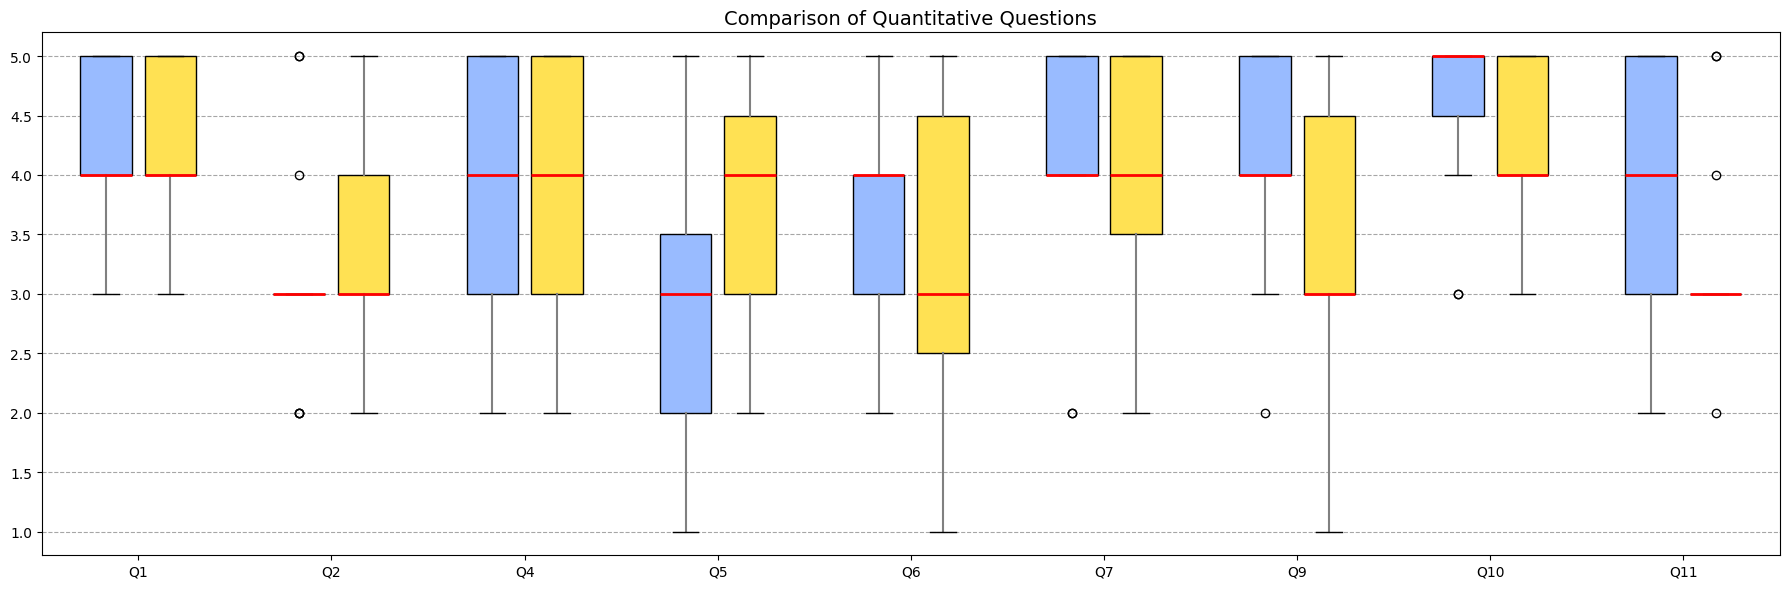

In [31]:
quan_questions = ["The content on the website conveys a healthy and active lifestyle",
                  "The content on the website inspires me to pursue a healthier lifestyle",
                  "The content on the website showcases inclusivity for different age groups",
                  "The content on the website showcases inclusivity for different cultural backgrounds",
                  "The content on the website showcases inclusivity for different body types",
                  "The content on the website portrays people that can be perceived as relatable",
                  "Based on the content of the website, I get the feeling that the gym has a sense of community among gym-goers",
                  "The content on the website conveys a feeling of a supportive atmosphere",
                  "The content on the website promotes opportunities for connection with others in the gym"]

titles = title = ["Q1", "Q2", "Q4", "Q5", "Q6", "Q7", "Q9", "Q10", "Q11"]

generate_b_boxplot(df_a, df_b, quan_questions, titles)

In [5]:
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)

Pandas version: 2.2.2
Matplotlib version: 3.8.0


## 2.1 Question boxplots generator

Change the 3rd and 4th parameters (as below)

`generate_boxplot(df_a, df_b, "put the question here", "put the question number here")`

Here you need to click into this section to see and modify the pameraters.

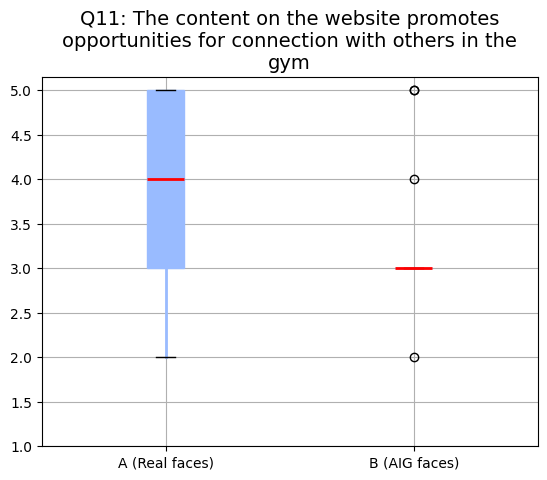

In [ ]:
# Wellness Q1, Q2
# The content on the website conveys a healthy and active lifestyle
# The content on the website inspires me to pursue a healthier lifestyle
# Inclusivity Q4, Q5, Q6, Q7
# The content on the website showcases inclusivity for different age groups
# The content on the website showcases inclusivity for different cultural backgrounds
# The content on the website showcases inclusivity for different body types
# The content on the website portrays people that can be perceived as relatable
# Socialization Q9, Q10, Q11
# Based on the content of the website, I get the feeling that the gym has a sense of community among gym-goers
# The content on the website conveys a feeling of a supportive atmosphere
# The content on the website promotes opportunities for connection with others in the gym



# Change the 3rd and 4th parameters as the instruction below
# generate_boxplot(df_a, df_b, "put the question here", "put the question number here")
generate_boxplot(df_a, df_b, "The content on the website promotes opportunities for connection with others in the gym", "Q11")

## 2.2 Mann-Whitney U test

In [ ]:
!pip install --upgrade gensim
!pip install scipy==1.14.1

import scipy
from scipy.stats import mannwhitneyu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
print(f"SciPy version: {scipy.__version__}")

SciPy version: 1.14.1


In [ ]:
quan_questions = ["The content on the website conveys a healthy and active lifestyle",
                  "The content on the website inspires me to pursue a healthier lifestyle",
                  "The content on the website showcases inclusivity for different age groups",
                  "The content on the website showcases inclusivity for different cultural backgrounds",
                  "The content on the website showcases inclusivity for different body types",
                  "The content on the website portrays people that can be perceived as relatable",
                  "Based on the content of the website, I get the feeling that the gym has a sense of community among gym-goers",
                  "The content on the website conveys a feeling of a supportive atmosphere",
                  "The content on the website promotes opportunities for connection with others in the gym"]

for i in quan_questions:
  u_stat, p_val = mannwhitneyu(df_a[i].astype(float), df_b[i].astype(float), alternative='two-sided')
  print(i)
  print(f"U Statistic: {u_stat}")
  print(f"P-value: {p_val}")
  if p_val < 0.05:
    print("significant")

The content on the website conveys a healthy and active lifestyle
U Statistic: 90.5
P-value: 0.32850306248043437
The content on the website inspires me to pursue a healthier lifestyle
U Statistic: 96.0
P-value: 0.4744647542430478
The content on the website showcases inclusivity for different age groups
U Statistic: 111.5
P-value: 0.9827278050645993
The content on the website showcases inclusivity for different cultural backgrounds
U Statistic: 62.0
P-value: 0.031912810397529495
significant
The content on the website showcases inclusivity for different body types
U Statistic: 125.0
P-value: 0.6072497543081238
The content on the website portrays people that can be perceived as relatable
U Statistic: 125.0
P-value: 0.5932359698050761
Based on the content of the website, I get the feeling that the gym has a sense of community among gym-goers
U Statistic: 148.5
P-value: 0.12180239324201228
The content on the website conveys a feeling of a supportive atmosphere
U Statistic: 143.0
P-value: 0.

#### One-tailed playground

In [ ]:
for i in quan_questions:
  u_stat, p_val = mannwhitneyu(df_a[i].astype(float), df_b[i].astype(float), alternative='less')
  print(i)
  print(f"U Statistic: {u_stat}")
  print(f"P-value: {p_val}")
  if p_val < 0.05:
    print("significant")

The content on the website conveys a healthy and active lifestyle
U Statistic: 90.5
P-value: 0.16425153124021719
The content on the website inspires me to pursue a healthier lifestyle
U Statistic: 96.0
P-value: 0.2372323771215239
The content on the website showcases inclusivity for different age groups
U Statistic: 111.5
P-value: 0.49136390253229967
The content on the website showcases inclusivity for different cultural backgrounds
U Statistic: 62.0
P-value: 0.015956405198764748
significant
The content on the website showcases inclusivity for different body types
U Statistic: 125.0
P-value: 0.7111805303765497
The content on the website portrays people that can be perceived as relatable
U Statistic: 125.0
P-value: 0.71859248352458
Based on the content of the website, I get the feeling that the gym has a sense of community among gym-goers
U Statistic: 148.5
P-value: 0.9441768660919039
The content on the website conveys a feeling of a supportive atmosphere
U Statistic: 143.0
P-value: 0.92

In [ ]:
for i in quan_questions:
  u_stat, p_val = mannwhitneyu(df_a[i].astype(float), df_b[i].astype(float), alternative='greater')
  print(i)
  print(f"U Statistic: {u_stat}")
  print(f"P-value: {p_val}")
  if p_val < 0.05:
    print("significant")

The content on the website conveys a healthy and active lifestyle
U Statistic: 90.5
P-value: 0.8467471375143498
The content on the website inspires me to pursue a healthier lifestyle
U Statistic: 96.0
P-value: 0.7763534670177927
The content on the website showcases inclusivity for different age groups
U Statistic: 111.5
P-value: 0.5258921120139844
The content on the website showcases inclusivity for different cultural backgrounds
U Statistic: 62.0
P-value: 0.985680162396708
The content on the website showcases inclusivity for different body types
U Statistic: 125.0
P-value: 0.3036248771540619
The content on the website portrays people that can be perceived as relatable
U Statistic: 125.0
P-value: 0.29661798490253805
Based on the content of the website, I get the feeling that the gym has a sense of community among gym-goers
U Statistic: 148.5
P-value: 0.06090119662100614
The content on the website conveys a feeling of a supportive atmosphere
U Statistic: 143.0
P-value: 0.079542300989753

## 2.3 All boxplots generateor

## Playground

### Boxplots for Q1: The content on the website conveys a healthy and active lifestyle italicized text

In [ ]:
q1_a = pd.Series(df_a['The content on the website conveys a healthy and active lifestyle'])
q1_a.rename("A", inplace=True)

q1_b = pd.Series(df_b['The content on the website conveys a healthy and active lifestyle'])
q1_b.rename("B", inplace=True)

df_q1 = pd.concat([q1_a, q1_b], axis=1)
df_q1 = df_q1.astype(float)
df_q1

,A,B
0,3.0,5.0
1,5.0,4.0
2,4.0,5.0
3,5.0,4.0
4,3.0,5.0
5,5.0,4.0
6,3.0,5.0
7,4.0,4.0
8,4.0,4.0
9,4.0,4.0


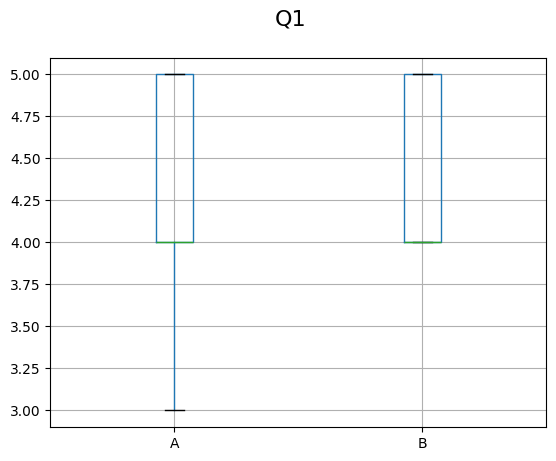

In [ ]:
ax = df_q1.boxplot()
ax.get_figure().suptitle(t='Q1', fontsize=16);

### Age and nationality

In [ ]:
age_a = df_a['Age'].astype(int)

age_a.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15 entries, 0 to 14
Series name: Age
Non-Null Count  Dtype
--------------  -----
15 non-null     int64
dtypes: int64(1)
memory usage: 248.0 bytes


In [ ]:
age_b = df_b['Age'].astype(int)

age_b.info()

<class 'pandas.core.series.Series'>
RangeIndex: 13 entries, 0 to 12
Series name: Age
Non-Null Count  Dtype
--------------  -----
13 non-null     int64
dtypes: int64(1)
memory usage: 232.0 bytes
